In [1]:
#CV2 is the module of openCV for python, this module will deal with graphics such as images and videos.
#In this file, it is used together with imutils to process and read the dataset which are all images.
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import imutils

In [2]:
#os is used to set the working directory in order to access the dataset
import os
os.chdir('D:\Samples\samples')

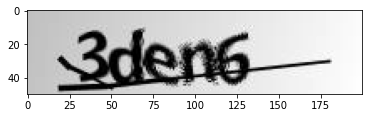

In [3]:
#imread reads images from a graphic file
img = cv2.imread("3den6.png", 0)

#imshow displays the data, numpy array, as an image
plt.imshow(img, 'gray')

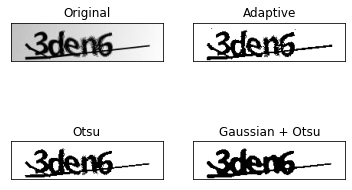

In [4]:
#adaptive thresholding - this method calculates the threshold value for smaller regions.
#This will be for images that does not have constant lighting values
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

#otsu thresholding - this thresholding method automatically assigns a value compared to global thresholding
#which needs an assigned constant value
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#otsu thresholding with gaussian blur - this method is just like the otsu but with gaussian blurring to
#smoothen the image by blurring the image. By blurring the image, the edges become smoother
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images = [img, th, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

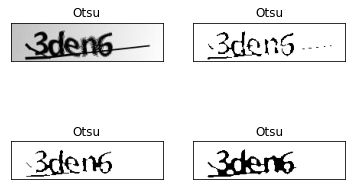

In [5]:
#Removing noise - in this case the line in the image
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations = 1)
dilation2 = cv2.dilate(th2, kernel, iterations = 1)
dilation3 = cv2.dilate(th3, kernel, iterations = 1)

titles2 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images2[i], 'gray')
    plt.title(titles[2])
    plt.xticks([]), plt.yticks([])
    
plt.show()

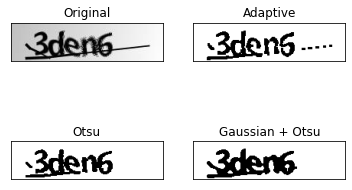

In [6]:
#Erosion is used to remove the pixels on the object's boundary
erosion = cv2.erode(dilation, kernel, iterations = 1)
erosion2 = cv2.erode(dilation2, kernel, iterations = 1)
erosion3 = cv2.erode(dilation3, kernel, iterations = 1)

titles3 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images3 = [img, erosion, erosion2, erosion3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

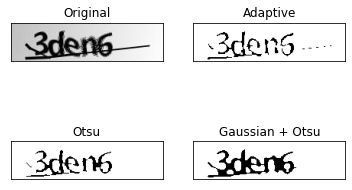

In [7]:
#Further remove noise after the erosion
kernel = np.ones((3,1), np.uint8)
dilation2_1 = cv2.dilate(erosion, kernel, iterations=1)
dilation2_2 = cv2.dilate(erosion2, kernel, iterations=1)
dilation2_3 = cv2.dilate(erosion3, kernel, iterations=1)

titles4 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images4 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

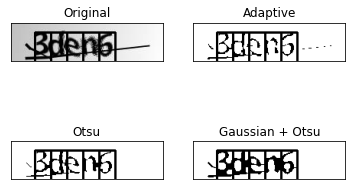

In [10]:
#Bounds each character inside a box for post-segmentation
x, y, w, h = 31, 13, 21, 39
for i in range(5):
    cv2.rectangle(img, (x,y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w
    
titles5 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images5 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images5[i], 'gray')
    plt.title(titles5[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()